In [1]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
def concat_ids(series):
    return '_'.join(series.astype(str))

In [3]:
monthly_df = gpd.read_file('/Volumes/squirrel-utopia/national_wf_disaster_hosp/local_data/monthly_wf_exposure/main_analysis/month_2018-04-01.geojson')

<Axes: >

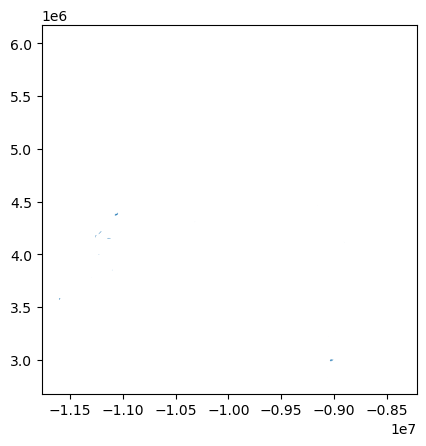

In [4]:
monthly_df.plot()

In [5]:
print(monthly_df)


    ID_climate_hazard  buffer_dist  \
0                   6      10000.0   
1                   9      10000.0   
2                  25      10000.0   
3                  56      10000.0   
4                  59      10000.0   
5                 753      10000.0   
6                 987      10000.0   
7                1000      10000.0   
8                1531      10000.0   
9                2542      10000.0   
10               2543      10000.0   
11               5448      10000.0   
12               5488      10000.0   
13               5529      10000.0   
14               5574      10000.0   
15               5575      10000.0   
16               5692      10000.0   
17               5708      10000.0   
18               5716      10000.0   
19               5722      10000.0   
20               5723      10000.0   
21               5737      10000.0   
22               5750      10000.0   
23               5751      10000.0   
24               5752      10000.0   
25          

In [6]:
intersects = monthly_df.sjoin(monthly_df, how="left", predicate="intersects")

In [7]:
print(intersects)

    ID_climate_hazard_left  buffer_dist_left  \
0                        6           10000.0   
1                        9           10000.0   
2                       25           10000.0   
3                       56           10000.0   
4                       59           10000.0   
5                      753           10000.0   
6                      987           10000.0   
7                     1000           10000.0   
8                     1531           10000.0   
9                     2542           10000.0   
10                    2543           10000.0   
10                    2543           10000.0   
11                    5448           10000.0   
12                    5488           10000.0   
13                    5529           10000.0   
14                    5574           10000.0   
15                    5575           10000.0   
16                    5692           10000.0   
17                    5708           10000.0   
18                    5716           100

In [8]:
print(intersects.columns)

Index(['ID_climate_hazard_left', 'buffer_dist_left', 'geometry', 'index_right',
       'ID_climate_hazard_right', 'buffer_dist_right'],
      dtype='object')


In [9]:
intersects_diss = intersects.dissolve("ID_climate_hazard_right", aggfunc={"ID_climate_hazard_left": concat_ids})

In [10]:
print(intersects_diss)


                                                                  geometry  \
ID_climate_hazard_right                                                      
6                        POLYGON ((-10315172.728 4308526.683, -10315170...   
9                        POLYGON ((-11253117.785 4182922, -11253097.402...   
25                       POLYGON ((-11604374.093 3579452.17, -11604373....   
56                       POLYGON ((-11126784.055 4152764.453, -11126773...   
59                       POLYGON ((-11096451.387 3852974.115, -11096451...   
753                      POLYGON ((-11226661.105 4190180.178, -11226563...   
987                      POLYGON ((-9037415.018 2996498.278, -9037453.4...   
1000                     POLYGON ((-11074573.4 4386380.959, -11074573.1...   
1531                     POLYGON ((-9056088.629 2835836.398, -9056090.1...   
2542                     POLYGON ((-8904337.61 4123185.234, -8904335.39...   
2543                     POLYGON ((-8902246.343 4112468.697, -89

In [11]:
intersects_diss = intersects_diss.reset_index().dissolve("ID_climate_hazard_left",
                                                         aggfunc={"ID_climate_hazard_right": concat_ids})


In [12]:
print(intersects_diss)

                                                                 geometry  \
ID_climate_hazard_left                                                      
1000                    POLYGON ((-11074573.4 4386380.959, -11074573.1...   
1531                    POLYGON ((-9056088.629 2835836.398, -9056090.1...   
25                      POLYGON ((-11604374.093 3579452.17, -11604373....   
2542                    POLYGON ((-8904337.61 4123185.234, -8904335.39...   
2543_5752               POLYGON ((-8902241.478 4112468.208, -8902241.4...   
5448                    POLYGON ((-10544601.278 6019895.518, -10544600...   
5488                    POLYGON ((-8984153.206 3266085.704, -8984153.2...   
5529                    POLYGON ((-9051376.418 3220127.567, -9051376.4...   
5574                    POLYGON ((-8892677.665 5108410.038, -8892677.6...   
5575                    POLYGON ((-10442919.425 5880546.44, -10442919....   
56                      POLYGON ((-11126784.055 4152764.453, -11126773...   

In [165]:
print(intersects_diss.head())

                                                                 geometry  \
ID_climate_hazard_left                                                      
1000                    POLYGON ((-11074573.4 4386380.959, -11074573.1...   
1531                    POLYGON ((-9056088.629 2835836.398, -9056090.1...   
25                      POLYGON ((-11604374.093 3579452.17, -11604373....   
2542                    POLYGON ((-8904337.61 4123185.234, -8904335.39...   
2543_5752               POLYGON ((-8902241.478 4112468.208, -8902241.4...   

                       ID_climate_hazard_right  
ID_climate_hazard_left                          
1000                                      1000  
1531                                      1531  
25                                          25  
2542                                      2542  
2543_5752                            2543_5752  


In [13]:
print(intersects_diss.columns)

Index(['geometry', 'ID_climate_hazard_right'], dtype='object')


In [14]:
# rename ID_climtae_hazard_left to ID_climate_hazard
intersects_diss = intersects_diss.rename(columns={"ID_climate_hazard_right" : "ID_climate_hazard"})
# select ID climate hazard and geometry
intersects_diss = intersects_diss[["ID_climate_hazard", "geometry"]]
intersects_diss = intersects_diss.reset_index(drop = True)
# print head
print(intersects_diss.head())
print(intersects_diss.columns)


  ID_climate_hazard                                           geometry
0              1000  POLYGON ((-11074573.4 4386380.959, -11074573.1...
1              1531  POLYGON ((-9056088.629 2835836.398, -9056090.1...
2                25  POLYGON ((-11604374.093 3579452.17, -11604373....
3              2542  POLYGON ((-8904337.61 4123185.234, -8904335.39...
4         2543_5752  POLYGON ((-8902241.478 4112468.208, -8902241.4...
Index(['ID_climate_hazard', 'geometry'], dtype='object')


In [ ]:
print(intersects_diss)

In [97]:
print(intersects_diss.columns)

Index(['ID_climate_hazard', 'geometry'], dtype='object')


In [142]:
# Example GeoDataFrame
gdf = gpd.GeoDataFrame({
    'id': [1, 2, 3],
    'geometry': [
        Point(0, 0).buffer(1),  # Circle around (0, 0)
        Point(1, 1).buffer(1),  # Circle around (1, 1)
        Point(3, 3).buffer(1)   # Circle around (3, 3)
    ]
})




In [143]:
print(gdf)

   id                                           geometry
0   1  POLYGON ((1 0, 0.99518 -0.09802, 0.98079 -0.19...
1   2  POLYGON ((2 1, 1.99518 0.90198, 1.98079 0.8049...
2   3  POLYGON ((4 3, 3.99518 2.90198, 3.98079 2.8049...


<Axes: >

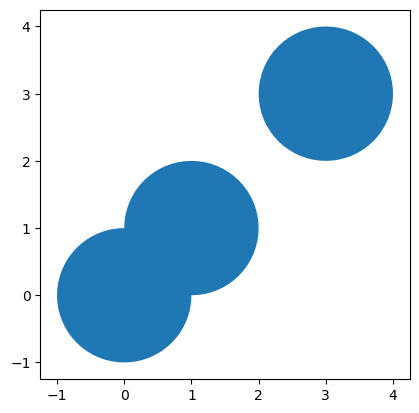

In [144]:
gdf.plot()

In [145]:
# Perform spatial self-join
intersects = gdf.sjoin(gdf, how="left", predicate="intersects")

In [146]:
print(intersects)

   id_left                                           geometry  index_right  \
0        1  POLYGON ((1 0, 0.99518 -0.09802, 0.98079 -0.19...            0   
0        1  POLYGON ((1 0, 0.99518 -0.09802, 0.98079 -0.19...            1   
1        2  POLYGON ((2 1, 1.99518 0.90198, 1.98079 0.8049...            0   
1        2  POLYGON ((2 1, 1.99518 0.90198, 1.98079 0.8049...            1   
2        3  POLYGON ((4 3, 3.99518 2.90198, 3.98079 2.8049...            2   

   id_right  
0         1  
0         2  
1         1  
1         2  
2         3  


In [148]:
intersects_diss = intersects.dissolve("id_right", aggfunc={"id_left": concat_ids})

In [149]:
print(intersects_diss)

                                                   geometry id_left
id_right                                                           
1         POLYGON ((0.99518 -0.09802, 0.98079 -0.19509, ...     1_2
2         POLYGON ((0.99518 -0.09802, 0.98079 -0.19509, ...     1_2
3         POLYGON ((4 3, 3.99518 2.90198, 3.98079 2.8049...       3


<Axes: >

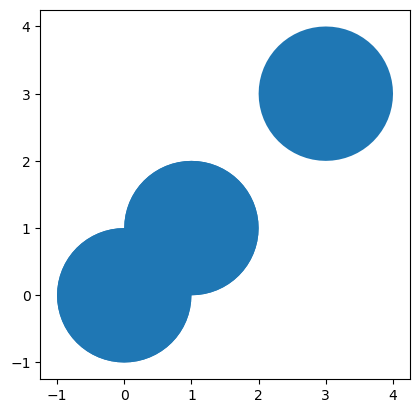

In [150]:
intersects_diss.plot()

In [151]:
intersects_diss = intersects_diss.reset_index().dissolve("id_left", aggfunc={"id_right": concat_ids})


In [152]:
print(intersects_diss)

                                                  geometry id_right
id_left                                                            
1_2      POLYGON ((0.98079 -0.19509, 0.95694 -0.29028, ...      1_2
3        POLYGON ((4 3, 3.99518 2.90198, 3.98079 2.8049...        3
